In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_train_path = "data/train"
dataset_test_path = "data/test"
dataset_validation_path = "data/validation"

img_width = 180
img_height = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    dataset_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    #validation_split=0.2,  # 20% dari train akan jadi validation
    #subset="training",
    #seed=42  # Pastikan ada seed agar pembagian tetap konsisten
)

data_val = tf.keras.utils.image_dataset_from_directory(
    dataset_validation_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    #validation_split=0.2,  # Sama dengan data_train
    #subset="validation",
    #seed=42
)

data_test = tf.keras.utils.image_dataset_from_directory(
    dataset_test_path,
    image_size=(img_height, img_width),
    shuffle=False,  # Jangan acak agar prediksi sesuai dengan urutan label
    batch_size=batch_size
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [3]:
data_cat = data_train.class_names

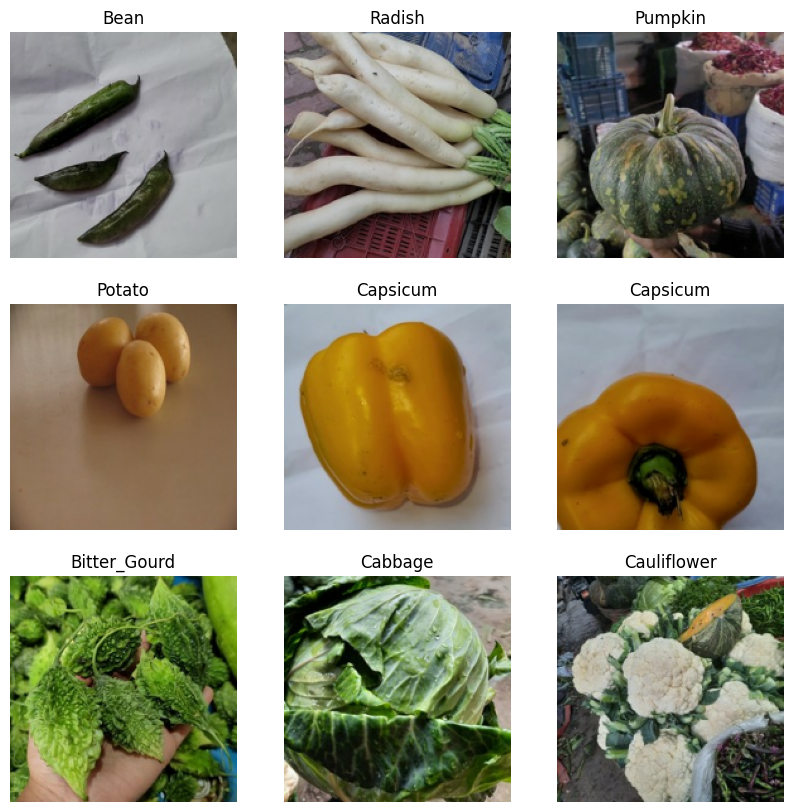

In [4]:


plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')



In [5]:
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(data_cat), activation='softmax')  # Softmax untuk klasifikasi
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:


model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [9]:

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

callbacks = [early_stop, reduce_lr]

In [ ]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, callbacks=callbacks)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 265ms/step - accuracy: 0.4582 - loss: 2.2123 - val_accuracy: 0.7663 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 272ms/step - accuracy: 0.8054 - loss: 0.6342 - val_accuracy: 0.7843 - val_loss: 0.7020 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 244ms/step - accuracy: 0.8875 - loss: 0.3714 - val_accuracy: 0.9160 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 297ms/step - accuracy: 0.9262 - loss: 0.2325 - val_accuracy: 0.8437 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 5/20
268/469 ━━━━━━━━━━━━━━━━━━━━ 1:14 369ms/step - accuracy: 0.9357 - loss: 0.2176

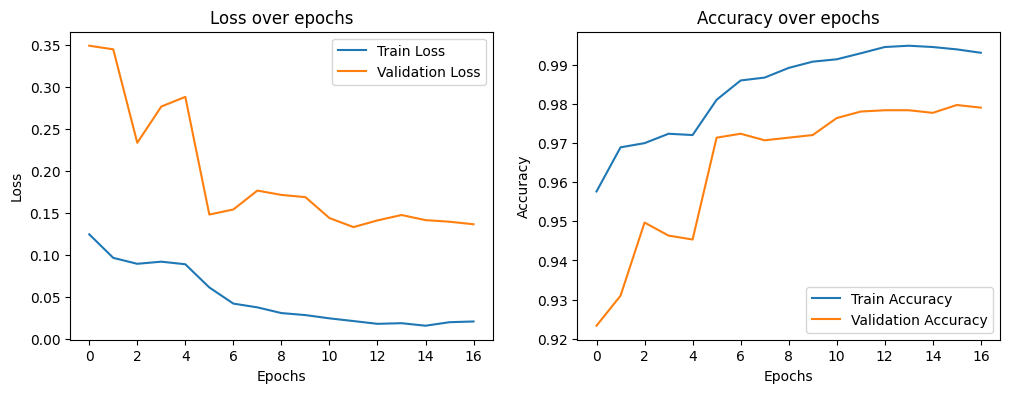

In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over epochs')
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')
    
    plt.show()

plot_loss_accuracy(history)